## Project Week02

Yilun Wu (yw528)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, ttest_1samp, norm, shapiro, t
from scipy.optimize import minimize
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Problem 1

In [2]:
np.random.seed(530) # A 'random' seed 
sample_nums = [10, 100, 1000]
sample_size = 100

# Sample data and compute skewness and kurtosis
for sample_num in sample_nums:
    skews, kurts = np.zeros(sample_num), np.zeros(sample_num)
    skews_unbiased, kurts_unbiased = np.zeros(sample_num), np.zeros(sample_num)
    for i in range(sample_num):
        sample = np.random.normal(size=sample_size)
        skews[i] = skew(sample)
        kurts[i] = kurtosis(sample)
        skews_unbiased[i] = skew(sample, bias=False)
        kurts_unbiased[i] = kurtosis(sample, bias=False)

    if sample_num < 30:
        print(f"For sample num = {sample_num}, t-test is used.")
        t_statistics_skew, p_value_skew_t = ttest_1samp(skews, popmean=0, alternative = 'two-sided')
        t_statistics_kurt, p_value_kurt_t = ttest_1samp(kurts, popmean=0, alternative = 'two-sided')
        print(f"Skewness: t-statistics = {t_statistics_skew}, p-value = {p_value_skew_t}")
        print(f"Kurtosis: t-statistics = {t_statistics_kurt}, p-value = {p_value_kurt_t}")
        t_statistics_skew, p_value_skew_t = ttest_1samp(skews_unbiased, popmean=0, alternative = 'two-sided')
        t_statistics_kurt, p_value_kurt_t = ttest_1samp(kurts_unbiased, popmean=0, alternative = 'two-sided')
        print(f"Skewness (unbiased): t-statistics = {t_statistics_skew}, p-value = {p_value_skew_t}")
        print(f"Kurtosis (unbiased): t-statistics = {t_statistics_kurt}, p-value = {p_value_kurt_t}")
    else:
        print(f"For sample num = {sample_num}, z-score is used.")
        z_score_skew, p_value_skew_z = ztest(skews, value=0)
        z_score_kurt, p_value_kurt_z = ztest(kurts, value=0)
        print(f"Skewness: z-score = {z_score_skew}, p-value = {p_value_skew_z}")
        print(f"Kurtosis: z-score = {z_score_kurt}, p-value = {p_value_kurt_z}")
        z_score_skew, p_value_skew_z = ztest(skews_unbiased, value=0)
        z_score_kurt, p_value_kurt_z = ztest(kurts_unbiased, value=0)
        print(f"Skewness (unbiased): t-statistics = {t_statistics_skew}, p-value = {p_value_skew_t}")
        print(f"Kurtosis (unbiased): t-statistics = {t_statistics_kurt}, p-value = {p_value_kurt_t}")
    print("Sample num = {}".format(sample_num))
    print("Sample size= {}".format(sample_size))
    print("-"*50)

For sample num = 10, t-test is used.
Skewness: t-statistics = 2.8215724381452607, p-value = 0.019995608280360885
Kurtosis: t-statistics = -3.203256330861448, p-value = 0.010774855568671277
Skewness (unbiased): t-statistics = 2.8215724381452603, p-value = 0.019995608280360896
Kurtosis (unbiased): t-statistics = -2.549219734176733, p-value = 0.031234705388163295
Sample num = 10
Sample size= 100
--------------------------------------------------
For sample num = 100, z-score is used.
Skewness: z-score = 0.3267027040455755, p-value = 0.7438927548550127
Kurtosis: z-score = -0.30800895755477076, p-value = 0.7580755163403082
Skewness (unbiased): t-statistics = 2.8215724381452603, p-value = 0.019995608280360896
Kurtosis (unbiased): t-statistics = -2.549219734176733, p-value = 0.031234705388163295
Sample num = 100
Sample size= 100
--------------------------------------------------
For sample num = 1000, z-score is used.
Skewness: z-score = -0.4570366239513826, p-value = 0.6476447215782437
Kurto

### Problem 2

In [3]:
# Read data from csv file
data = pd.read_csv("problem2.csv")

In [4]:
# Fit the data using OLS and compute the error vector
x = data['x'].tolist()
y = data['y'].tolist()

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
error = model.resid
print(f"Error vector: {error}")

Error vector: [-0.83848479  0.83529586  1.02742825  1.3197107  -0.1523166  -0.38641696
  1.28474611  0.6785721  -0.23279104  0.68498605  0.90479441  1.03882326
  0.88188173  0.14094188  0.59443017  0.71760455  0.36758746 -0.389435
  4.12403686 -0.05680601  0.66842671 -0.98837595 -1.31557297  0.26537682
  0.41153462  0.7788615  -1.84465372  1.06907408  1.82068861 -0.98639189
 -0.75239421 -1.01950983  0.48915464 -1.6436499  -0.2732364   1.18787117
  0.97341581  0.13851152  0.41529646  1.12914889  0.31369632 -0.78483505
  0.2665901   0.50569968 -1.67738413  0.65902192 -0.25881239 -1.99793919
 -0.64026358  1.52109106 -0.92685988 -1.71158989  0.63461011  0.50398216
 -0.36865304  0.08488123 -1.05294004 -5.08389235 -0.59820773  1.16069069
  1.62901979  0.52427467 -0.04299272  0.57525757 -1.46693675  1.54281348
  0.25996545 -1.27897259  0.30440434 -0.98989937  0.2006473  -1.26898348
  0.68496909 -0.2821325  -1.11770849  0.73021764 -1.20161542  1.26304551
  0.46058222 -0.78173218  3.53168002  1

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           4.34e-06
Time:                        23:08:02   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.325      -0.120       0.360
x1             0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

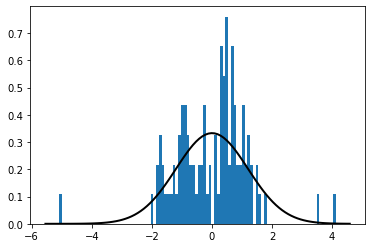

Mean: -1.2212453270876722e-17
Variance: 1.4361484854062607
Skewness: -0.26726658552879606
Kurtosis: 3.1931010009568777


In [6]:
# Check its distribution
mu, sigma = norm.fit(error)
plt.hist(error, 100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

print(f"Mean: {np.mean(error)}")
print(f"Variance: {np.var(error)}")
print(f"Skewness: {skew(error)}")
print(f"Kurtosis: {kurtosis(error)}")

In [7]:
# Check the normality of the error vector using Shapiro-Wilk test
statistic, p_value = shapiro(error)
print(f"Shapiro-Wilk test: statistic = {statistic}, p-value = {p_value}")
if p_value < 0.05: print("Reject null hypothesis: we have statistical significant evidence that the error vector is not normally distributed")
else: print("Fail to reject null hypothesis: we do not have statistical significant evidence that the error vector is not normally distributed")

Shapiro-Wilk test: statistic = 0.938385546207428, p-value = 0.00015389148029498756
Reject null hypothesis: we have statistical significant evidence that the error vector is not normally distributed


In [8]:
# Fit the data using MLE given the assumption of normality

# Function for computing the negative log likelihood for optimization
def neg_log_likelihood_norm(param, x, y):
    k, b, sigma = param
    y_pred = k*x+b
    loss = y-y_pred

    distribution = norm(0, sigma)
    neg_log_likelihood = -np.log(distribution.pdf(loss)).sum()
    return neg_log_likelihood

x, y = data['x'], data['y']
mle_norm_model = minimize(neg_log_likelihood_norm, np.array([1, 1, 1]), args=(x, y))
print(mle_norm_model)

      fun: 159.99209668916265
 hess_inv: array([[ 1.53151629e-02, -9.36571125e-05, -3.27247108e-04],
       [-9.36571125e-05,  1.42031789e-02, -5.02748104e-05],
       [-3.27247108e-04, -5.02748104e-05,  7.44495285e-03]])
      jac: array([ 1.90734863e-06,  5.72204590e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.60520485, 0.11983628, 1.19839409])


In [9]:
# Fit the data using MLE using the assumption of a t-distribution of the errors 

# Function for computing the negative log likelihood for optimization
def neg_log_likelihood_t_dist(param, x, y):
    k, b, df, scale = param
    y_pred = k*x+b
    loss = y-y_pred

    distribution = t(df, scale)
    neg_log_likelihood = -np.log(distribution.pdf(loss)).sum()
    return neg_log_likelihood

x, y = data['x'], data['y']
mle_t_dist_model = minimize(neg_log_likelihood_t_dist, np.array([1, 1, 1, 1]), args=(x, y))
print(mle_t_dist_model)

      fun: 155.51528727578673
 hess_inv: array([[ 1.42924378e-02,  9.59175036e-04,  1.64599941e-02,
         9.59175036e-04],
       [ 9.59175036e-04,  5.03337829e-01, -9.52159832e-03,
        -4.96662171e-01],
       [ 1.64599941e-02, -9.52159832e-03,  8.01025553e+00,
        -9.52159832e-03],
       [ 9.59175036e-04, -4.96662171e-01, -9.52159832e-03,
         5.03337829e-01]])
      jac: array([ 0.00000000e+00,  1.90734863e-06, -1.90734863e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([0.55893058, 0.06998071, 6.75735126, 0.06998071])


In [10]:
# Check goodness of fit using AIC ahd BIC
y_norm, y_t_dist = mle_norm_model.x[0]*x+mle_norm_model.x[1], mle_t_dist_model.x[0]*x+mle_t_dist_model.x[1]
k_norm, k_t_dist = len(mle_norm_model.x), len(mle_t_dist_model.x)
n_norm, n_t_dist = len(y), len(y)

# AIC
AIC_norm = 2*k_norm-2*(-mle_norm_model.fun)
AIC_t_dist = 2*k_t_dist-2*(-mle_t_dist_model.fun)
print(f"AIC from normality: {AIC_norm}")
print(f"AIC from t-distribution on error: {AIC_t_dist}")
print("Based on AIC, we have", end=" ")
if AIC_norm < AIC_t_dist: print("using MLE given the assumption of normality is a better fit, ")
else: print("using MLE using the assumption of a T distribution of the errors is a better fit, ")
print("since it has a smaller AIC value.")
print("-"*50)

# BIC
BIC_norm = k_norm*np.log(n_norm)-2*(-mle_norm_model.fun)
BIC_t_dist = k_t_dist*np.log(n_t_dist)-2*(-mle_t_dist_model.fun)
print(f"BIC from normality: {BIC_norm}")
print(f"BIC from t-distribution on error: {BIC_t_dist}")
print("Based on BIC, we have", end=" ")
if BIC_norm < BIC_t_dist: print("using MLE given the assumption of normality is a better fit, ")
else: print("using MLE using the assumption of a T distribution of the errors is a better fit, ")
print("since it has a smaller BIC value.")

AIC from normality: 325.9841933783253
AIC from t-distribution on error: 319.03057455157347
Based on AIC, we have using MLE using the assumption of a T distribution of the errors is a better fit, 
since it has a smaller AIC value.
--------------------------------------------------
BIC from normality: 333.7997039362896
BIC from t-distribution on error: 329.4512552955258
Based on BIC, we have using MLE using the assumption of a T distribution of the errors is a better fit, 
since it has a smaller BIC value.


### Problem 3

#### Simulate AR(1) through AR(3) processes

AR(1)

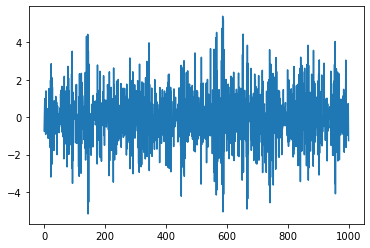

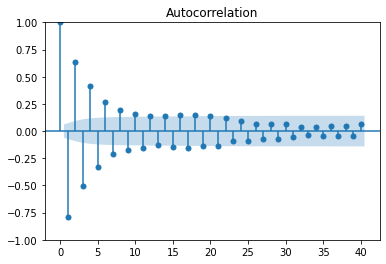

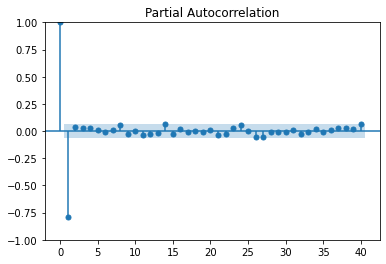

In [11]:
ar1 = np.array([1, 0.8])
ma = np.array([1])
ar = ArmaProcess(ar1, ma)
data_sim_ar1 = ar.generate_sample(nsample=1000)
plt.plot(data_sim_ar1)
plot_acf(data_sim_ar1, lags=40)
plt.show()
plot_pacf(data_sim_ar1, lags=40, method="ywm")
plt.show()

AR(2)

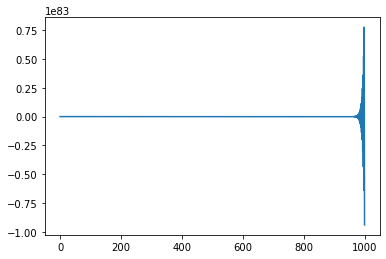

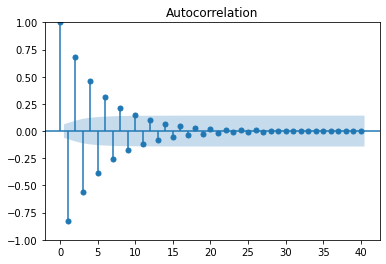

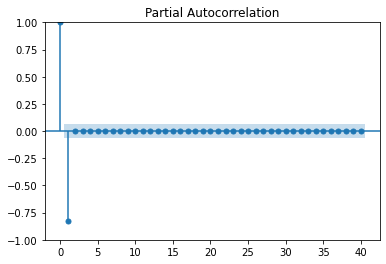

In [12]:
ar2 = np.array([1, 0.8, -0.5])
ma = np.array([1])
ar = ArmaProcess(ar2, ma)
data_sim_ar2 = ar.generate_sample(nsample=1000)
plt.plot(data_sim_ar2)
plot_acf(data_sim_ar2, lags=40)
plt.show()
plot_pacf(data_sim_ar2, lags=40, method="ywm")
plt.show()

AR(3)

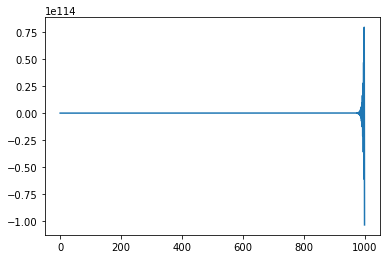

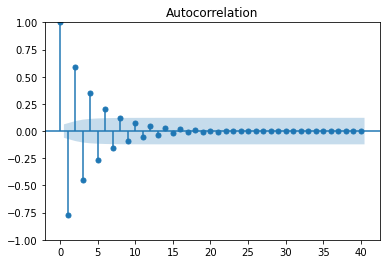

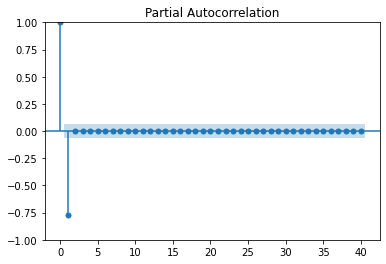

In [13]:
ar3 = np.array([1, 0.8, -0.5, 0.2])
ma = np.array([1])
ar = ArmaProcess(ar3, ma)
data_sim_ar3 = ar.generate_sample(nsample=1000)
plt.plot(data_sim_ar3)
plot_acf(data_sim_ar3, lags=40)
plt.show()
plot_pacf(data_sim_ar3, lags=40, method="ywm")
plt.show()

#### Simulate MA(1) through MA(3) processes

MA(1)

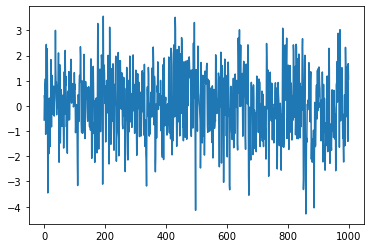

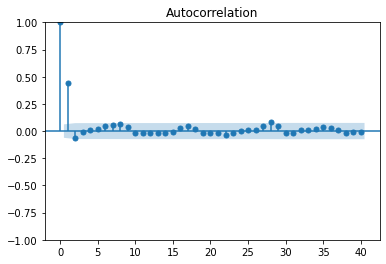

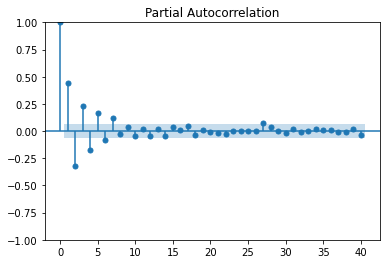

In [14]:
ar = np.array([1])
ma1 = np.array([1, 0.8])
ma = ArmaProcess(ar, ma1)
data_sim_ma1 = ma.generate_sample(nsample=1000)
plt.plot(data_sim_ma1)
plot_acf(data_sim_ma1, lags=40)
plt.show()
plot_pacf(data_sim_ma1, lags=40, method="ywm")
plt.show()

MA(2)

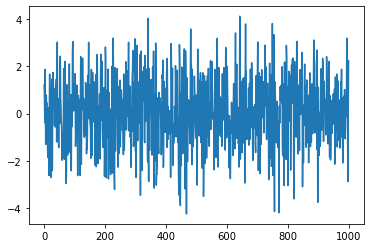

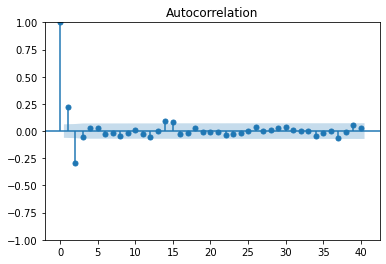

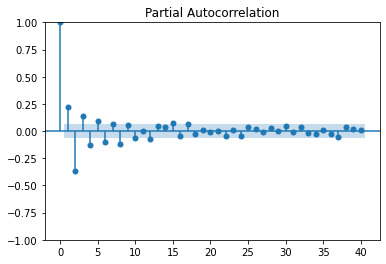

In [15]:
ar = np.array([1])
ma2 = np.array([1, 0.8, -0.5])
ma = ArmaProcess(ar, ma2)
data_sim_ma2 = ma.generate_sample(nsample=1000)
plt.plot(data_sim_ma2)
plot_acf(data_sim_ma2, lags=40)
plt.show()
plot_pacf(data_sim_ma2, lags=40, method="ywm")
plt.show()

MA(3)

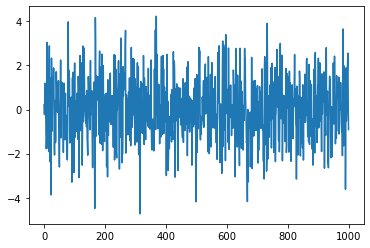

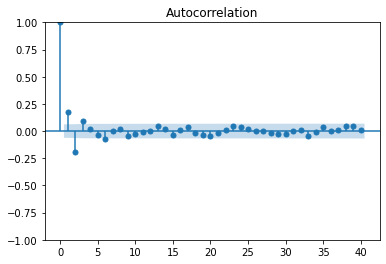

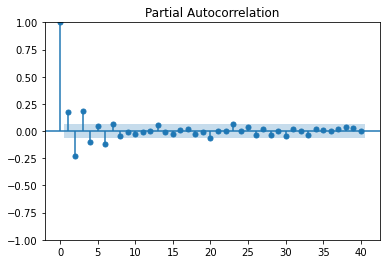

In [16]:
ar = np.array([1])
ma3 = np.array([1, 0.8, -0.5, 0.2])
ma = ArmaProcess(ar, ma3)
data_sim_ma3 = ma.generate_sample(nsample=1000)
plt.plot(data_sim_ma3)
plot_acf(data_sim_ma3, lags=40)
plt.show()
plot_pacf(data_sim_ma3, lags=40, method="ywm")
plt.show()